Gabriel Riegner: 17 JAN 2024

---

##### 1. Matrix Formalism

Let $\mathbf{A}^{N\times N}$ be an undirected unweighted adjacency matrix without self-loops, and $\mathbf{1}^{N\times 1}$ be a column vector.

Using matrix formalism, write the expression for:  
(a) The vector $k$ whose elements are the degrees $k_i$ of all nodes $i = 1,2,...,N$  
(b) The total number of links $L$ in the network  
(c) The number of triangles $T$ in the network, where triangle means three nodes, each connected by links to the other two (use trace of a matrix)  
(d) The vector $k_{nn}$ whose element $i$ is the sum of the degrees of node $i$'s neighbors  
(e) The vector $k_{nnn}$ whose element $i$ is the sum of the degrees of node $i$'s second neighbors (do not include a node among its own second neighbors)

##### 2. Graph Representation of Networks

The adjacency matrix ($\mathbf{A_{ij}}$) can be written as links in a $L\times 2$ matrix, whose rows contain the starting + end points $i$ and $j$ of each link

For **networks (1)** and **network (2)** calculate:  
(a) The adjacency matrices  
(b) The link lists  
(c) The clustering coefficient of **network (1)**  
(d) Switch labels of nodes 1 and 2 in **network (1)**, how does that change the adjacency matrix?  
(e) The link list?  
(f) What can you not infer from the link list that you can infer from the adjacency matrix?  
(g) In **network (1)** how many paths (with possible repetition of nodes and link) of length 4 exist, starting from node 1 and ending at node 3? And in **network 2**?

##### 3. Degree, Clustering Coefficient, and Components

(a) Consider an undirected network of size $N$ in which each node has degree $k=1$. Which condition does $N$ have to satisfy? What is the degree distribution of this network? How many components does the network have?  
(b) Consider now a network in which each node has degree $k=2$ and clustering coefficient $C=1$. How does the network look like? What condition does $N$ satisfy in this case?

##### 4. Calculating Network Metrics


(a.i) degree distribution:	 ['0.00', '0.00', '0.11', '0.16', '0.11', '0.16', '0.11', '0.11', '0.05', '0.05', '0.05', '0.00', '0.05', '0.00', '0.00', '0.05']
(a.ii) clustering coefficients:	 {'R2-D2': '0.67', 'CHEWBACCA': '1.00', 'C-3PO': '0.60', 'LUKE': '0.34', 'DARTH VADER': '0.67', 'CAMIE': '1.00', 'BIGGS': '0.54', 'LEIA': '0.42', 'BERU': '0.90', 'OWEN': '1.00', 'OBI-WAN': '0.76', 'MOTTI': '1.00', 'TARKIN': '1.00', 'HAN': '1.00', 'DODONNA': '1.00', 'GOLD LEADER': '0.80', 'WEDGE': '0.80', 'RED LEADER': '0.57', 'RED TEN': '1.00'}



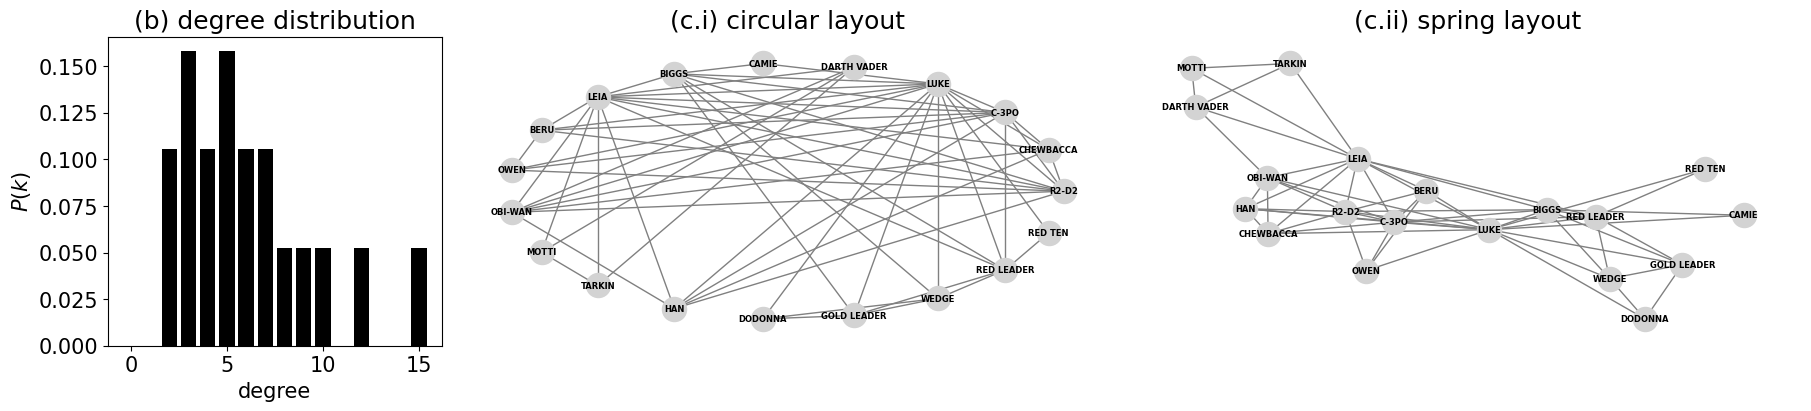

In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

with open("hw1.json", "r") as f:
    df = json.load(f)

G = nx.Graph()
G.add_nodes_from(df["characters"])
G.add_edges_from(df["edges"])

# (a.i) degree distribution vs degree
degree_dist = nx.degree_histogram(G)
degree = range(len(degree_dist))
P_k = [degree / sum(degree_dist) for degree in degree_dist]
print("\n(a.i) degree distribution:\t", [f"{p:.2f}" for p in P_k])

# (a.ii) clustering coefficient of all nodes
clustering_coeff = nx.clustering(G)
print("(a.ii) clustering coefficients:\t", {k: f"{v:.2f}" for k, v in clustering_coeff.items()}, end="\n\n")

# (b) plot the degree distribution
fig, axs = plt.subplots(ncols=3, figsize=(18, 4), layout="constrained", gridspec_kw=dict(width_ratios=[1, 2, 2]))

axs[0].set_title("(b) degree distribution")
axs[0].bar(degree, P_k, color='k')
axs[0].set_xlabel("degree")
axs[0].set_ylabel(r"$P(k)$")

# (c) visualize network using two graph layouts
draw_kwargs = dict(with_labels=True, node_color="lightgray", edge_color="gray", font_size=6, font_weight="bold")

axs[1].set_title("(c.i) circular layout")
pos_circular = nx.circular_layout(G)
nx.draw(G, pos_circular, ax=axs[1], **draw_kwargs)

axs[2].set_title("(c.ii) spring layout")
pos_spring = nx.spring_layout(G)
nx.draw(G, pos_spring, ax=axs[2], **draw_kwargs)

(c) The circular layout (c.i) positions nodes on a circle which is useful for visualizing relative positions of nodes, but less informative of network structure. The spring layout (c.ii) uses a force-directed algorithm (Fruchterman-Reingold) to place nodes with more connections closer together. It provide another layer of information about node position within a network, and is more informative in understanding the central characters in the plot.